In [29]:
import os

import cv2

In [27]:
os.getcwd()

'C:\\Users\\blue\\2023_project'

In [2]:
! pip install torch

     ------------------------------------- 172.4/172.4 MB 16.0 MB/s eta 0:00:00


In [4]:
! pip install torchvision

     ---------------------------------------- 1.2/1.2 MB 18.8 MB/s eta 0:00:00


In [7]:
! pip install torchvision.models

ERROR: Could not find a version that satisfies the requirement torchvision.models (from versions: none)
ERROR: No matching distribution found for torchvision.models


In [9]:
from torch.hub import load_state_dict_from_url

In [54]:
import torch
import torchvision.transforms as transforms
from torchvision.models import vgg19
from torch.hub import load_state_dict_from_url
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
# Super Resolution을 위한 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
# 사전 학습된 VGG19 모델 다운로드
model_url = "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth"
model_weights = load_state_dict_from_url(model_url)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\blue/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|███████████████████████████████████████████████████████████████████████████████| 548M/548M [00:12<00:00, 45.2MB/s]


In [84]:
img = cv2.imread('C:\\Users\\blue\\2023_project\\img3.jpg')

In [18]:
# VGG19 모델에서 필요한 레이어 가져오기
content_layers = ["conv_4"]
model = vgg19(pretrained=False)
model.load_state_dict(model_weights)
model = model.features.to(device).eval()

C:\Users\blue\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\blue\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [86]:
# 이미지 로드 및 전처리
def load_image(image_path):
    image = Image.open("C:\\Users\\blue\\2023_project\\img3.jpg").convert("RGB")
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = preprocess(image).unsqueeze(0).to(device)
    return image

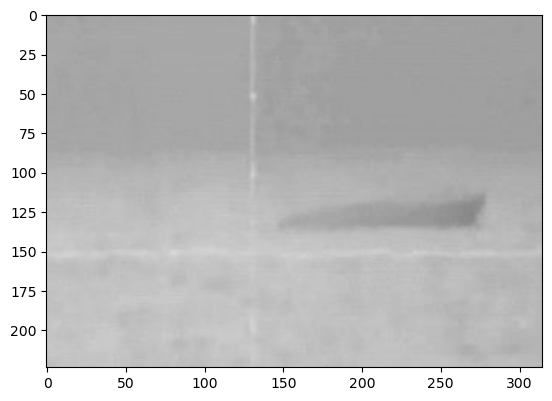

In [87]:
plt.imshow(img)

In [88]:
# Super Resolution 적용
def super_resolve(image_path, output_path):
    image = load_image(image_path)
    with torch.no_grad():
        features = model(image)

    # Super Resolution을 위한 추가적인 처리를 수행할 수 있습니다.
    # 예를 들면, features를 입력으로 받는 다른 네트워크를 사용하여 해상도를 높일 수 있습니다.

    # 처리된 이미지 저장
    save_image(image, output_path)

In [89]:
# 이미지 경로와 출력 경로 설정
image_path = "input.jpg"
output_path = "output.jpg"


In [90]:
# Super Resolution 적용
super_resolve(image_path, output_path)

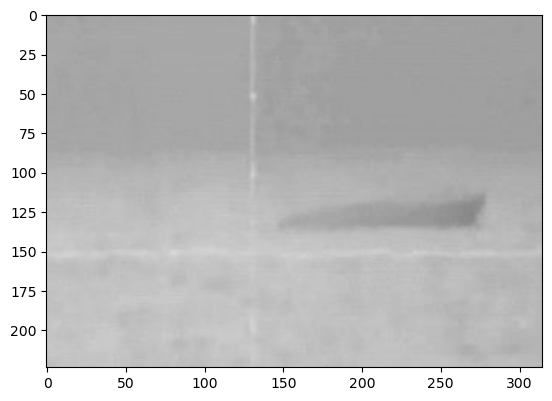

In [91]:
plt.imshow(img)

In [92]:
img2 = cv2.imread('C:\\Users\\blue\\2023_project\\output.jpg')

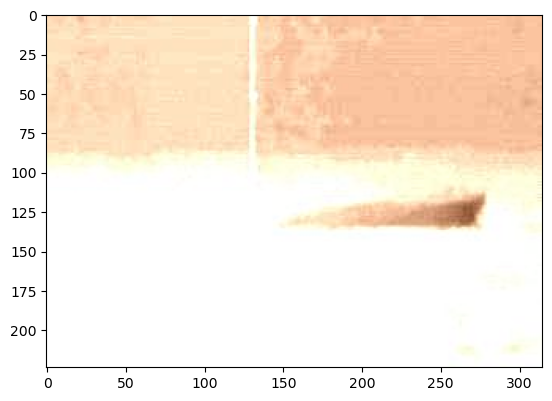

In [93]:
plt.imshow(img2)

Text(0.5, 1.0, 'after')

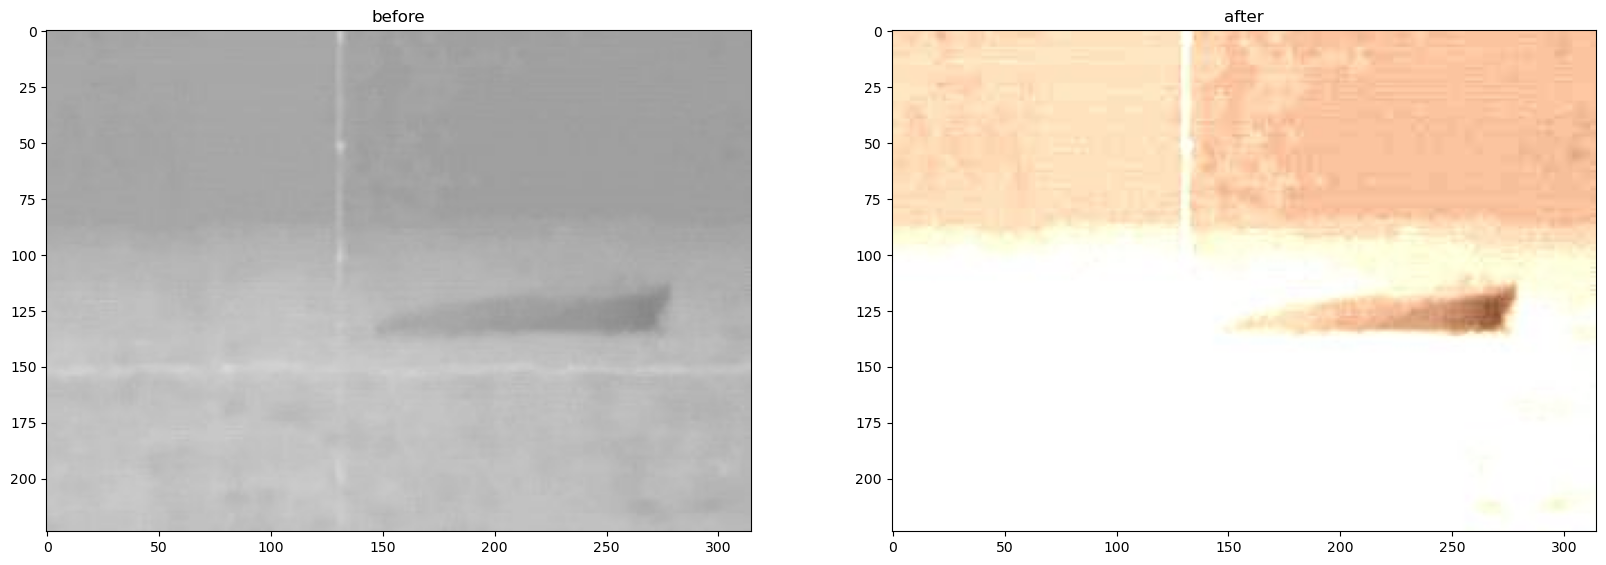

In [94]:
fig = plt.figure(figsize = (20,20))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('before')


plt.subplot(1,2,2)
plt.imshow(img2)
plt.title('after')

In [82]:
fig

<Figure size 2000x2000 with 0 Axes>